## **World Endurance Championship 2012-2023 + Le Mans 2011 Analysis Walktrough**

In this notebook, I will perform <b>exploratory data analysis (EDA) on the [FIA WEC season from 2012-2023 and Le Mans 2011 Race](https://www.kaggle.com/datasets/feliperoll/fia-wec-2012-2023-le-mans-2011) database.</b> The main objective here is to test and <b>improve my data analysis</b> and <b>uncover insights to some aspects of Endurance Racing</b>. This will be an ongoing project and may have several updates.


##### Those are the steps made for this analysis:

* [Preparing the Dataset and Data Cleaning](#Preparing-the-Dataset-and-Data-Cleaning)
    * [Importing packages](#Importing-all-necessary-packages)
    * [Importing data](#Importing-the-data)
    * [Observing our data](#Observing-our-data)
    * [ydata profiling](#Using-ydata-profiling-for-a-better-visualization)
    * [Data dictionary](#Data-dictionary)
    * [Renaming values](#Renaming-a-few-values)
    * [Dropping columns](#Dropping-a-few-columns-we-won't-use)
    * [Creating columns](#Creating-columns-for-future-use)
    * [Filling missing values](#Filling-missing-values)
    * [Looking for duplicated values](#Looking-for-duplicated-values)
    * [Saving the dataset](#Saving-the-cleaned-file-as-a-new-dataset)
* [Exploratory Analysis on Tyre Manufacturers](#Exploratory-Analysis-on-Tyre-Manufacturers)
    * [2017 Season - LMGTE](#Let's-take-a-look-at-the-performance-of-Michelin-and-Dunlop-in-2017-for-both-LMGTE-classes-to-better-understand-the-impact-those-manufacturers-had-throughout-the-seasons)
    * [2018-2019 Season - LMP2](#Let's-take-a-look-at-the-number-of-race-wins-of-Michelin-and-Dunlop-in-2018-2019-for-the-LMP2-class)
    * [Tyre Manufacturer analysis](#Here-we-gather-the-total-number-of-times-each-tyre-manufacturer-participated-in-a-class-on-all-seasons,-this-will-give-us-an-indicator-of-the-number-of-potential-class-wins-by-each-tyre-manufacturer-on-all-seasons-combined)
* [Exploratory analysis on car performances](#Exploratory-analysis-on-car-performances)
    * [LMP1 vs Hypercar](#Let's-compare-the-difference-in-performance-of-the-LMP1-era-to-the-Hypercars-era) 
    * [LMP2](#Let's-compare-the-difference-in-performance-of-the-LMP2)
    * [GTE](#Let's-compare-the-difference-in-performance-of-the-GTE)


# **Preparing the Dataset and Data Cleaning**

##### **Importing all necessary packages**

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

##### **Importing the data**

In [3]:
#loading the data from wec_data.csv
wec_analysis = pd.read_csv('C:\Data Science\Projetos\wec-analysis\datasets\wec_data.csv', sep=',')

##### **Observing our data**



In [4]:
#taking a look at the database
wec_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car               3035 non-null   object 
 1   overall_position  3035 non-null   int64  
 2   class_position    3035 non-null   int64  
 3   team              3035 non-null   object 
 4   vehicle           3035 non-null   object 
 5   class             3035 non-null   object 
 6   group             428 non-null    object 
 7   race              3035 non-null   object 
 8   event_duration    3035 non-null   int64  
 9   season            3035 non-null   object 
 10  laps              3035 non-null   int64  
 11  total_time        3026 non-null   object 
 12  gap_first         2948 non-null   object 
 13  gap_car_ahead     2946 non-null   object 
 14  tyres             3035 non-null   object 
 15  status            3035 non-null   object 
 16  fl_lap_number     3022 non-null   float64


In [5]:
#taking a look at the database
wec_analysis.sample(3)

,car,overall_position,class_position,team,vehicle,class,group,race,event_duration,season,...,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average,driver_1,driver_2,driver_3
1286,Panis Barthez Competition #23,13,8,Panis Barthez Competition,Ligier JSP217 - Gibson,LMP2,NaN,LeMans 2,24,2018-2019,...,23 Laps,1 Laps,Dunlop,Classified,4.0,3:30.800,232.7,René BINDER,Julien CANAL,William STEVENS
2183,United Autosports #23,19,8,United Autosports,Oreca 07 - Gibson,LMP2,NaN,Bahrain,6,2023,...,12 Laps,45.659,Goodyear,Classified,147.0,1:55.166,169.2,Joshua PIERSON,Tom BLOMQVIST,Oliver JARVIS
1844,Dempsey - Proton Racing #88,24,6,Dempsey - Proton Racing,Porsche 911 RSR - 19,LMGTE Am,NaN,Monza,6,2021,...,18 Laps,26.445,Michelin,Classified,122.0,1:47.209,194.5,Andrew HARYANTO,Marco SEEFRIED,Alessio PICARIELLO


##### **Using ydata profiling for a better visualization**

In [6]:
#using ydata profiling for another more in depth visualization
profile = ProfileReport(wec_analysis, title="Wec Analysis")
profile.to_file("wec-analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- *The dataset was made available on kaggle: https://www.kaggle.com/datasets/feliperoll/fia-wec-2012-2023-le-mans-2011*    
- *The dataset origin is from this sites: https://www.fiawec.com/en/past-seasons/36 and http://fiawec.alkamelsystems.com/index.php*  
- *It contains WEC seasons data, with information such as car, overall_position, class_position, race, season and so on.*  


### Data dictionary
<b>car</b>: Combination of team name and car number;<br><br>
<b>overall_position</b>: Overall position the car finished in that race;<br><br>
<b>class_position</b>: Class position the car finished in that race;<br><br>
<b>team</b>: Team name;<br><br>
<b>vehicle</b>: Full name of the vehicle;<br><br>
<b>class</b>: Class that each car competed on;<br><br>
<b>group</b>: Some classes had a “subclass”, that's what group show;<br><br>
<b>race</b>: Where the race took place;<br><br>
<b>event_duration</b>: How many hours the race had;<br><br>
<b>season</b>: Year the race took place;<br><br>
<b>laps</b>: How many laps each car did on the race;<br><br>
<b>total_time</b>: Total time that each car took to complete or retire in each race;<br><br>
<b>gap_first</b>: Time difference between that car and the race leader at the end of the race;<br><br>
<b>gap_car_ahead</b>: Time difference between that car and the car ahead at the end of the race;<br><br>
<b>tyres</b>: Tyre supplier of the car;<br><br>
<b>status</b>: If the car at the end of the race was Classified, Not Classified or Retired;<br><br>
<b>fl_lap_number</b>: Lap number of the fastest lap of that car;<br><br>
<b>fl_time</b>: Time if the fastest lap;<br><br>
<b>fl_kph_average</b>: Average speed in Km/h of the fastest lap of that car;<br><br>
<b>driver_1</b>: Name of the first driver;<br><br>
<b>driver_2</b>: Name of the second driver;<br><br>
<b>driver_3</b>: Name of the third driver.<br><br>

##### **Renaming a few values**

In [7]:
# Mapping for renaming classes
class_mapping = {
    'LM P1': 'LMP1',
    'LM P2': 'LMP2',
    'LM GTE Pro': 'LMGTE Pro',
    'LM GTE Am': 'LMGTE Am',
    'HYPERCAR': 'Hypercar'
}

# Renaming classes
wec_analysis['class'] = wec_analysis['class'].replace(class_mapping)
unique_classes_2012 = wec_analysis[wec_analysis['season'] == '2012']['class'].unique()
unique_classes_2012

array(['LMP1', 'LMP2', 'LMGTE Pro', 'LMGTE Am', 'CDNT'], dtype=object)

##### **Dropping a few columns we won't use**

In [8]:
#displaying the unique values in the 'group' column 
wec_analysis['group'].unique()

array(['H', 'L', nan, 'P/A'], dtype=object)

In [9]:
#dropping the columns driver_1, driver_2, and driver_3 abd group
wec_analysis.drop(['driver_1', 'driver_2', 'driver_3','group'], axis=1, inplace=True)

##### **Creating columns for future use**

In [10]:
# Create a new column 'season_race' by combining 'season' and 'race' with a '-'
wec_analysis['season_race'] = wec_analysis['race'] + '-' + wec_analysis['season']


In [11]:
# Replace '0' with '0:0.000' in the 'fl_time' column
wec_analysis['fl_time'] = wec_analysis['fl_time'].replace(0, '0:0.000')

# Convert the 'fl_time' column to datetime format (time only)
wec_analysis['fl_time'] = pd.to_datetime(wec_analysis['fl_time'], format='%M:%S.%f').dt.time

# Transform the 'fl_time_datetime' column to seconds
wec_analysis['fl_time_seconds'] = wec_analysis['fl_time'].apply(lambda x: x.minute * 60 + x.second + x.microsecond / 1e6)

wec_analysis.head(3)

,car,overall_position,class_position,team,vehicle,class,race,event_duration,season,laps,total_time,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average,season_race,fl_time_seconds
0,Toyota Racing #8,1,1,Toyota Racing,Toyota TS 040 - Hybrid,LMP1,Silverstone,6,2014,167,5:22:42.296,NaN,NaN,Michelin,Classified,112.0,00:01:44.646000,202.7,Silverstone-2014,104.646
1,Toyota Racing #7,2,2,Toyota Racing,Toyota TS 040 - Hybrid,LMP1,Silverstone,6,2014,166,5:23:14.056,1 Laps,1 Laps,Michelin,Classified,17.0,00:01:44.326000,203.3,Silverstone-2014,104.326
2,Porsche Team #20,3,3,Porsche Team,Porsche 919 Hybrid,LMP1,Silverstone,6,2014,165,5:22:47.120,2 Laps,1 Laps,Michelin,Classified,4.0,00:01:45.245000,201.5,Silverstone-2014,105.245


##### **Taking a look at the missing values and fixing them**

In [12]:
#displaying rows with missing values in the 'gap_first' column 
missing_gap_first = wec_analysis[wec_analysis['gap_first'].isnull()]
missing_gap_first.sample(3)

,car,overall_position,class_position,team,vehicle,class,race,event_duration,season,laps,total_time,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average,season_race,fl_time_seconds
2605,Toyota Racing #7,1,1,Toyota Racing,Toyota TS030 - Hybrid,LMP1,Shanghai,6,2012,191,6:01:29.292,NaN,NaN,Michelin,Classified,137.0,00:01:48.815000,180.3,Shanghai-2012,108.815
1583,Toyota Gazoo Racing #8,1,1,Toyota Gazoo Racing,Toyota TS050 - Hybrid,LMP1,LeMans,24,2019-2020,387,24:01:45.305,NaN,NaN,Michelin,Classified,3.0,00:03:19.762000,245.6,LeMans-2019-2020,199.762
519,Porsche Team #2,1,1,Porsche Team,Porsche 919 Hybrid,LMP1,Silverstone,6,2016,194,6:01:53.028,NaN,NaN,Michelin,Classified,159.0,00:01:40.303000,211.8,Silverstone-2016,100.303


In [13]:
#gap_first and gap_car_ahead are null because the car is in first position, let's fix that
#filling missing values in 'gap_first' and 'gap_car_ahead' columns with 0
wec_analysis['gap_first'].fillna(0, inplace=True)
wec_analysis['gap_car_ahead'].fillna(0, inplace=True)

In [14]:
#displaying rows with missing values in the 'total_time' column 
missing_total_time = wec_analysis[wec_analysis['total_time'].isnull()]
missing_total_time.sample(3)

,car,overall_position,class_position,team,vehicle,class,race,event_duration,season,laps,total_time,gap_first,gap_car_ahead,tyres,status,fl_lap_number,fl_time,fl_kph_average,season_race,fl_time_seconds
2771,Luxury Racing #58,28,7,Luxury Racing,Ferrari F458 Italia,LMGTE Am,Sebring,12,2012,0,NaN,325 Laps,83 Laps,Michelin,Not classified,NaN,NaT,NaN,Sebring-2012,NaN
3034,Lotus #31,28,9,Lotus,Lotus T128,LMP2,Cota,6,2013,0,NaN,187 Laps,84 Laps,Dunlop,Classified,NaN,NaT,NaN,Cota-2013,NaN
2865,Lotus #31,28,9,Lotus,Lotus T128,LMP2,Bahrain,6,2013,0,NaN,199 Laps,5 Laps,Dunlop,Not classified,NaN,NaT,NaN,Bahrain-2013,NaN


##### **Filling missing values**

In [15]:
#total_time, fl_lap_number,fl_time,fl_kph_average, fl_time_seconds is null because some cars did not classify, did not start or retired from race, let's fix that
#filling missing values in 'total_time', 'fl_lap_number', 'fl_time', and 'fl_kph_average' 'fl_time_seconds' columns with 0 
wec_analysis['total_time'].fillna(0, inplace=True)
wec_analysis['fl_lap_number'].fillna(0, inplace=True)
wec_analysis['fl_time'].fillna(0, inplace=True)
wec_analysis['fl_kph_average'].fillna(0, inplace=True)
wec_analysis['fl_time_seconds'].fillna(0, inplace=True)

*Some columns like the above have missing values because the car failed to finish the race so that data was not recorded, so we change it to "0" instead, keeping that in mind when the need arises to make mathematical insights with them.*

##### **Looking for duplicated values**

In [16]:
#taking a look at the updated database
wec_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car               3035 non-null   object 
 1   overall_position  3035 non-null   int64  
 2   class_position    3035 non-null   int64  
 3   team              3035 non-null   object 
 4   vehicle           3035 non-null   object 
 5   class             3035 non-null   object 
 6   race              3035 non-null   object 
 7   event_duration    3035 non-null   int64  
 8   season            3035 non-null   object 
 9   laps              3035 non-null   int64  
 10  total_time        3035 non-null   object 
 11  gap_first         3035 non-null   object 
 12  gap_car_ahead     3035 non-null   object 
 13  tyres             3035 non-null   object 
 14  status            3035 non-null   object 
 15  fl_lap_number     3035 non-null   float64
 16  fl_time           3035 non-null   object 


In [17]:
#verifying if we still have missing data
wec_analysis.isna().sum()

car                 0
overall_position    0
class_position      0
team                0
vehicle             0
class               0
race                0
event_duration      0
season              0
laps                0
total_time          0
gap_first           0
gap_car_ahead       0
tyres               0
status              0
fl_lap_number       0
fl_time             0
fl_kph_average      0
season_race         0
fl_time_seconds     0
dtype: int64

In [18]:
# Dropping duplicate rows
wec_analysis.drop_duplicates(inplace=True)

In [19]:
#verifying if we have duplicated values
wec_analysis.duplicated().sum()

0

*Now we don't have any missing or duplicated values.*

##### **Saving the cleaned file as a new dataset**

In [20]:
# Save the wec_analysis DataFrame to a CSV file
wec_analysis.to_csv('C:\Data Science\\Projetos\\wec-analysis\\datasets\\wec_data_clean.csv', index=False)

# **Exploratory Analysis on Tyre Manufacturers**


##### **Let's take a look at the performance of Michelin and Dunlop in 2017 for both LMGTE classes to better understand the impact those manufacturers had throughout the seasons**

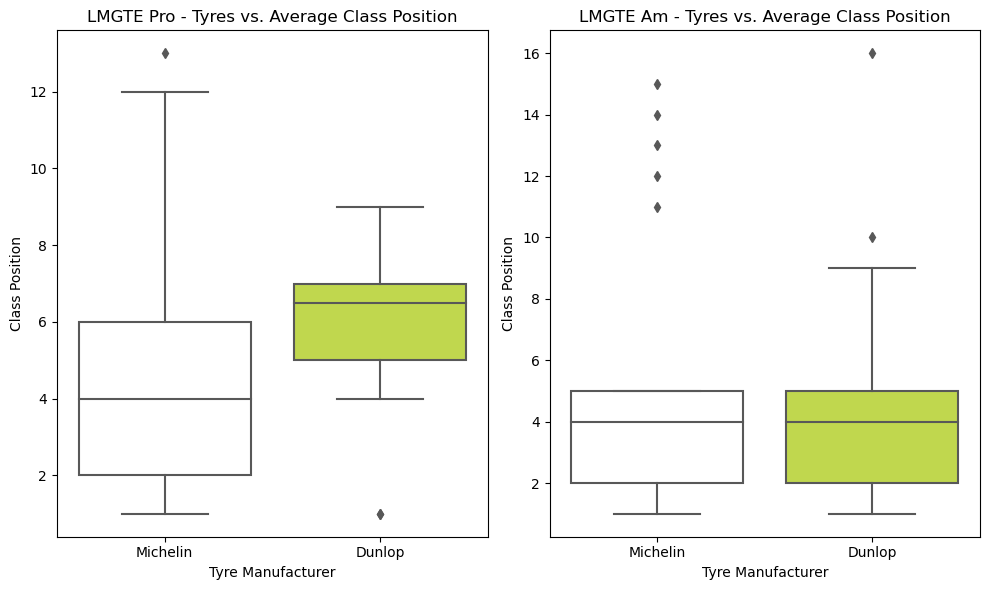

In [21]:
#average class position for the classes LMGTE Pro and LMGTE Am in the 2017 season with cars using either Dunlop or Michelin
wec_analysis_2017_season = wec_analysis[(wec_analysis['season'] == '2017') & (wec_analysis['class'].isin(['LMGTE Pro', 'LMGTE Am']))]

if not wec_analysis_2017_season.empty:
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='tyres', y='class_position', data=wec_analysis_2017_season[wec_analysis_2017_season['class'] == 'LMGTE Pro'], palette=['white', '#CFEE37'])
    plt.title('LMGTE Pro - Tyres vs. Average Class Position', loc='center')
    plt.xlabel('Tyre Manufacturer')
    plt.ylabel('Class Position')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='tyres', y='class_position', data=wec_analysis_2017_season[wec_analysis_2017_season['class'] == 'LMGTE Am'], palette=['white', '#CFEE37'])
    plt.title('LMGTE Am - Tyres vs. Average Class Position', loc='center')
    plt.xlabel('Tyre Manufacturer')
    plt.ylabel('Class Position')
    
    plt.tight_layout()
    plt.show()
else:
    print("No data points available for the season '2017' in LMGTE PRO and LMGTE AM classes.")


##### *We can see that in the Season 2017, Dunlop won only one race for the LMGTE Pro class while Michelin was vastly superior overall. In LMGTE Am, things were much closer, both tyre suppliers had a similiar season.*

##### **Let's take a look at the number of race wins of Michelin and Dunlop in 2018-2019 for the LMP2 class**

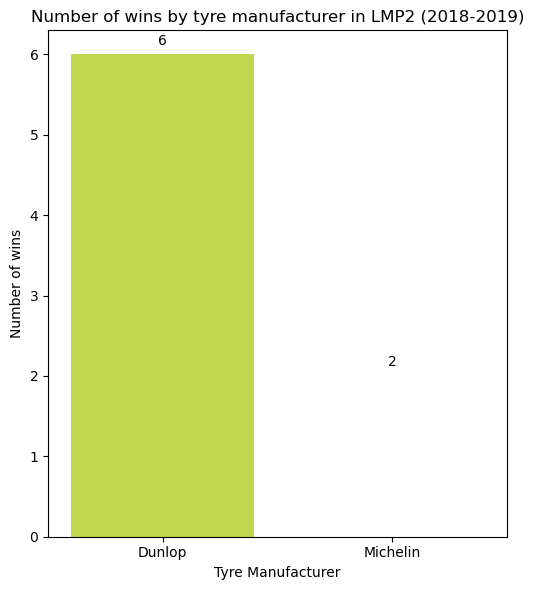

In [22]:
#class wins for the LMP2 class in the 2018-2019 season with cars using either Dunlop or Michelin
wec_analysis_2018_2019_season = wec_analysis[(wec_analysis['season'].isin(['2018-2019'])) & (wec_analysis['class'] == 'LMP2') & (wec_analysis['class_position'] == 1)]

if not wec_analysis_2018_2019_season.empty:
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x='tyres', data=wec_analysis_2018_2019_season, palette=['#CFEE37', 'white'])
    plt.xlabel('Tyre Manufacturer')
    plt.ylabel('Number of wins')
    plt.title('Number of wins by tyre manufacturer in LMP2 (2018-2019)')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()
else:
    print("No data points available for the '2018-2019' season in LMP2 class with Class Position = 1.")

##### *We can see that in the Season 2018-2019, Dunlop won 6 races compared to Michelin's 2 in the LMP2 class*

##### **Here we gather the total number of times each tyre manufacturer participated in a class on all seasons, this will give us an indicator of the number of potential class wins by each tyre manufacturer on all seasons combined**

In [23]:
#number of races each tyre manufacturer participated in a season
manufacturer_race_count = wec_analysis.groupby(['season', 'tyres'])['race'].nunique()

print(manufacturer_race_count)

season     tyres   
2011       Dunlop      1
           Hankook     1
           Michelin    1
2012       Dunlop      8
           Michelin    8
           Pirelli     8
2013       Dunlop      8
           Michelin    8
2014       Dunlop      8
           Michelin    8
2015       Dunlop      8
           Michelin    8
2016       Dunlop      9
           Michelin    9
2017       Dunlop      9
           Michelin    9
2018-2019  Dunlop      8
           Michelin    8
2019-2020  Goodyear    7
           Michelin    7
2021       Goodyear    6
           Michelin    6
2022       Goodyear    6
           Michelin    6
2023       Goodyear    7
           Michelin    7
Name: race, dtype: int64


In [24]:
#total number of classes each tyre manufacturer participated in a season
manufacturer_class_count = wec_analysis.groupby(['season', 'tyres'])['class'].nunique() * wec_analysis.groupby(['season', 'tyres'])['race'].nunique()

print(manufacturer_class_count)

season     tyres   
2011       Dunlop       4
           Hankook      1
           Michelin     4
2012       Dunlop      32
           Michelin    32
           Pirelli      8
2013       Dunlop      16
           Michelin    32
2014       Dunlop       8
           Michelin    40
2015       Dunlop      16
           Michelin    32
2016       Dunlop      36
           Michelin    45
2017       Dunlop      27
           Michelin    36
2018-2019  Dunlop       8
           Michelin    32
2019-2020  Goodyear     7
           Michelin    28
2021       Goodyear    12
           Michelin    18
2022       Goodyear     6
           Michelin    18
2023       Goodyear    14
           Michelin    14
dtype: int64


In [25]:
#total number of classes each tyre manufacturer participated in every season
manufacturer_class_sum = manufacturer_class_count.groupby('tyres').sum()

print(manufacturer_class_sum)

tyres
Dunlop      147
Goodyear     39
Hankook       1
Michelin    331
Pirelli       8
dtype: int64


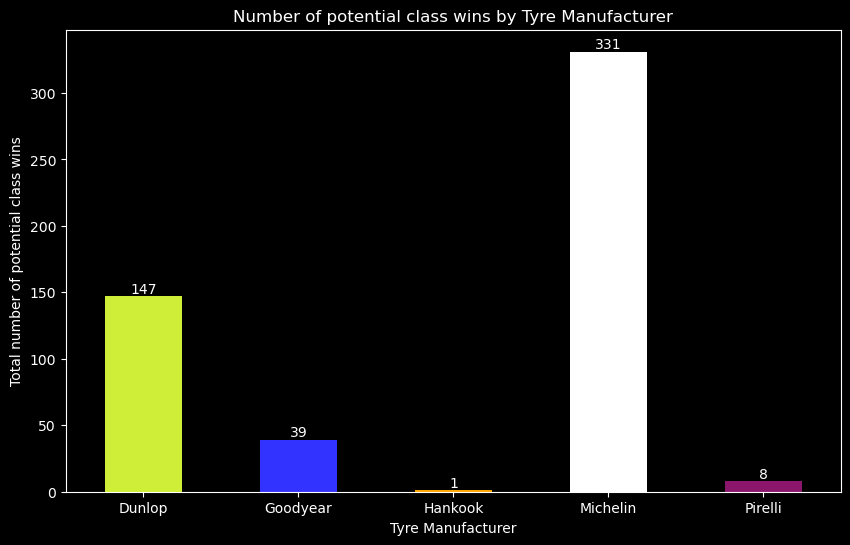

In [26]:
#creating the plot to show in a visual way
plt.style.use('dark_background') 

colors = ['#CFEE37', '#3333FF', '#FFA500', '#FFFFFF', '#8B166C']  # Define colors for each bar

plt.figure(figsize=(10, 6))
manufacturer_class_sum.plot(kind='bar', color=colors)

for i, value in enumerate(manufacturer_class_sum):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Tyre Manufacturer')
plt.xticks(rotation=0)
plt.ylabel('Total number of potential class wins')
plt.title('Number of potential class wins by Tyre Manufacturer')
plt.show()

##### **Now let's see the number of race wins of all classes and seasons for all tyre manufacturers**

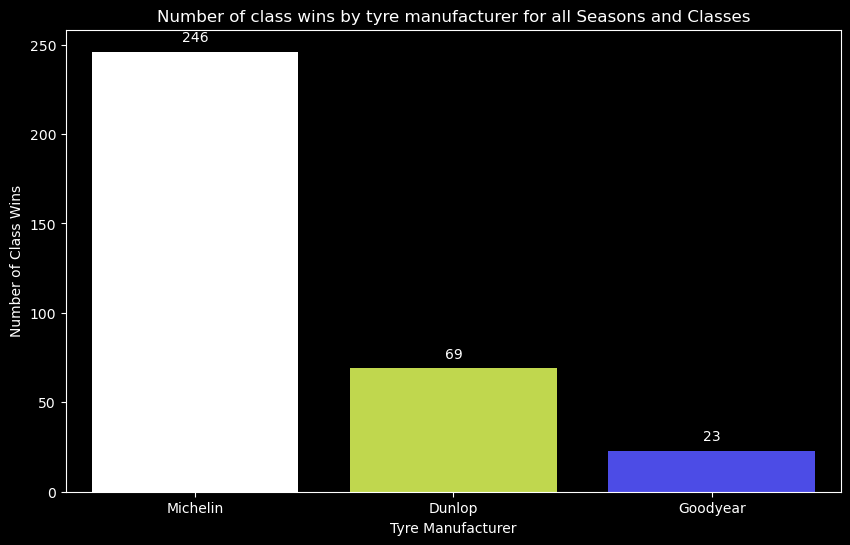

In [27]:
#class wins for all classes in all seasons for all tyre manufacturers
wec_analysis_all_seasons_classes = wec_analysis[wec_analysis['class_position'] == 1]

if not wec_analysis_all_seasons_classes.empty:
    plt.figure(figsize=(10, 6))
    
    ax = sns.countplot(x='tyres', data=wec_analysis_all_seasons_classes, palette=['white','#CFEE37', '#3333FF'])
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.xlabel('Tyre Manufacturer')
    plt.ylabel('Number of Class Wins')
    plt.title('Number of class wins by tyre manufacturer for all Seasons and Classes')
    
    plt.show()
else:
    print("No data points available for Class Position = 1 across all seasons and classes.")

##### *We can see that Michelin is by far the most dominant tyre supplier with almost 250 class wins, followed by Dunlop and Goodyear. Pirelli and Hankook never won a race at the time of this analysis*

##### **Now we see the percentage of wins by each tyre manufacturer in all seasons and classes**

In [28]:
class_position_1_by_manufacturer = wec_analysis[wec_analysis['class_position'] == 1]['tyres'].value_counts()

In [29]:
percentage_of_wins = class_position_1_by_manufacturer/manufacturer_class_sum * 100
percentage_of_wins = percentage_of_wins.dropna()
percentage_of_wins

tyres
Dunlop      46.938776
Goodyear    58.974359
Michelin    74.320242
dtype: float64

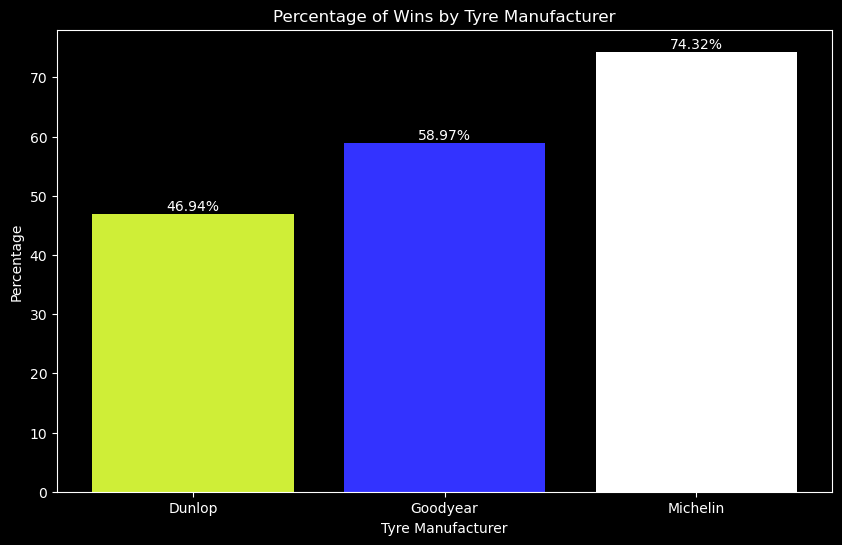

In [30]:
#winrateby each tyre manufacturer in all seasons and classes

colors = ['#CFEE37', '#3333FF', '#FFFFFF']  # Define colors for each bar

plt.figure(figsize=(10, 6))
plt.bar(percentage_of_wins.index, percentage_of_wins.values, color=colors)
plt.title('Percentage of Wins by Tyre Manufacturer')
plt.xlabel('Tyre Manufacturer')
plt.ylabel('Percentage')

for i, value in enumerate(percentage_of_wins.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

##### *Michelin has the most number of class wins and the highest percentage, but despite Dunlop having a much higher number of wins than Goodyear, the latter actually had better success*

# **Exploratory analysis on car performances**

##### **Let's compare the difference in performance of the LMP1 era to the Hypercars era**

*Most of the data will be compared on the Le Mans track, since it has been present in all the years the competition took place and has a wider range of data*

In [31]:
# Filter the data for status = 'Classified', class = 'LMP1'
filtered_data = wec_analysis[(wec_analysis['status'] == 'Classified') & (wec_analysis['class'] == 'LMP1')]

# Calculate the lowest fl_time for each season and each race
lowest_fl_time = filtered_data.groupby(['season', 'race'])['fl_time'].min()

print(lowest_fl_time)

season     race       
2011       LeMans         00:03:25.289000
2012       Bahrain        00:01:47.140000
           Fuji           00:01:28.088000
           Interlagos     00:01:23.070000
           LeMans         00:03:24.189000
                               ...       
2019-2020  Fuji           00:01:26.657000
           LeMans         00:03:19.264000
           Shanghai       00:01:48.428000
           Silverstone    00:01:37.289000
           Spa            00:02:02.154000
Name: fl_time, Length: 66, dtype: object


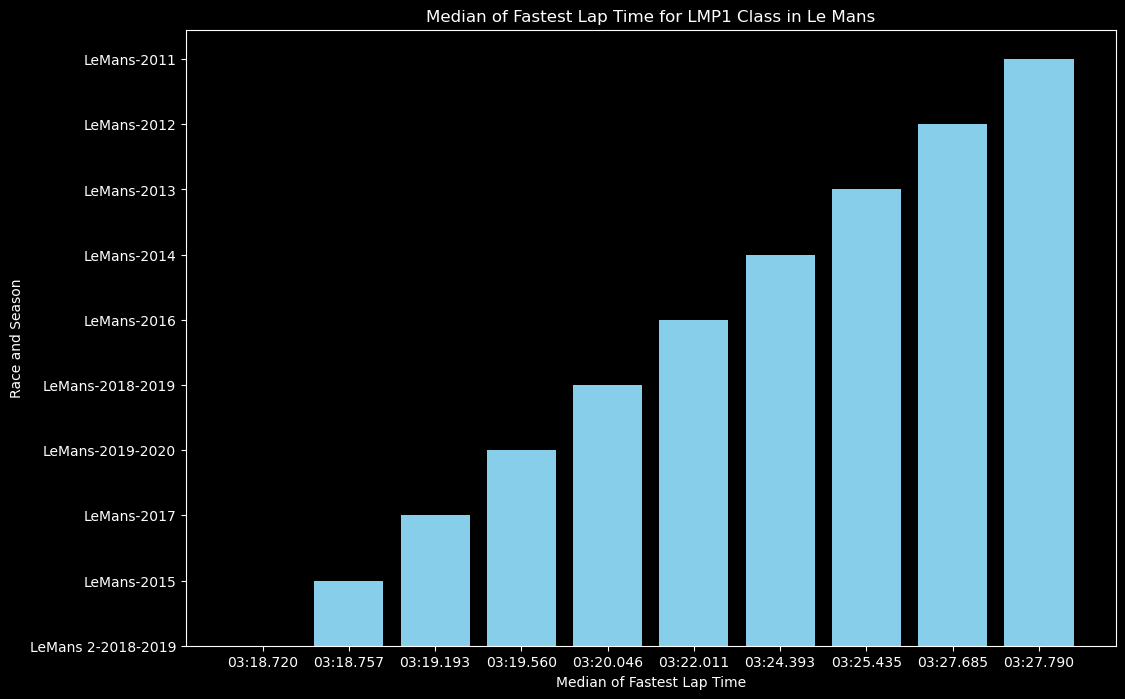

In [32]:
# Filter the data for status = 'Classified' and class = 'LMP1' and LeMans race
filtered_data_lmp1 = wec_analysis[((wec_analysis['status'] == 'Classified') & (wec_analysis['class'] == 'LMP1') & (wec_analysis['race'].str.startswith('LeMans')))]

# Calculate the median fl_time for each season_race in minutes and seconds
median_fl_time_lmp1 = filtered_data_lmp1.groupby(['season_race'])['fl_time_seconds'].median().apply(lambda x: f"{int(x//60):02d}:{x%60:06.3f}")

# Order the median fl_time values
median_fl_time_lmp1 = median_fl_time_lmp1.sort_values()

# Create a bar graph for the lowest fl_time for LMP1 class with bars in x-axis ordered by fl_time
plt.figure(figsize=(12, 8))
plt.bar(median_fl_time_lmp1, median_fl_time_lmp1.index, color='skyblue')
plt.xlabel('Median of Fastest Lap Time')
plt.ylabel('Race and Season')
plt.title('Median of Fastest Lap Time for LMP1 Class in Le Mans')
plt.show()

*Here we use the median to see the lap time for the LMP1 class in Le Mans, we see that the LMP1 class has had an improvement in the beggining, and then some ups and downs in lap time, there are a few things to note:*
* *The cars and teams improve over the year with more knowledge and data to base themselves on, so its natural to see this improvment;*
* *A few things that can change the lap time that we have no information such as weather, temperature and so on;*
* *There are many variables to take in cosideration such human error, number of cars, track condition, time of the year.*

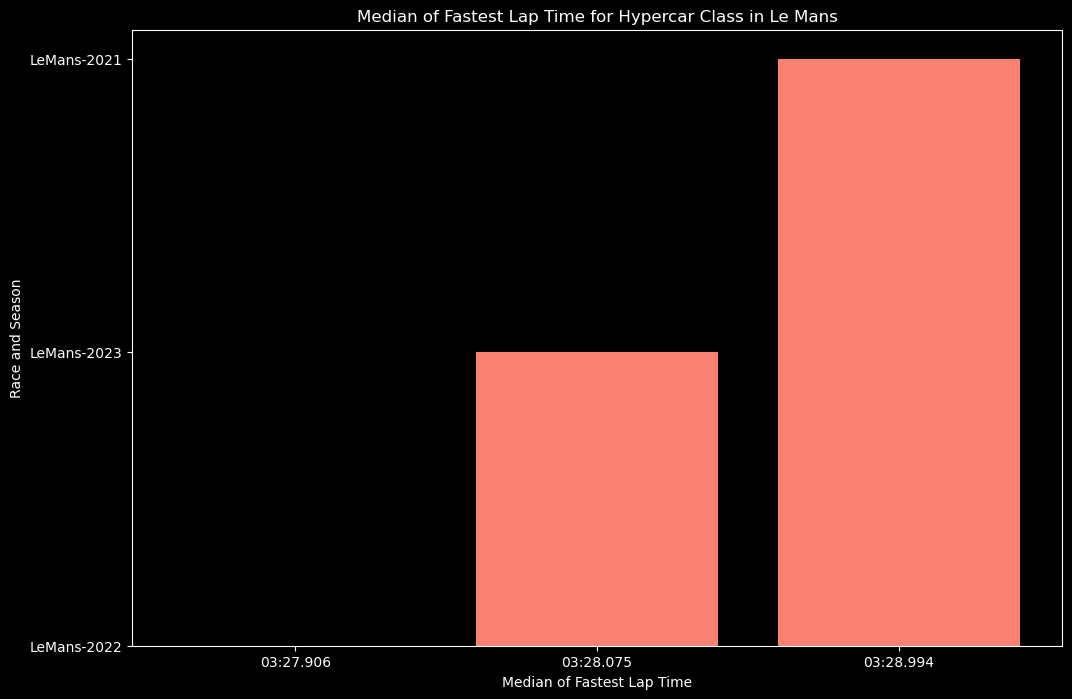

In [33]:
# Filter the data for status = 'Classified' and class = 'Hypercar' and LeMans race
filtered_data_hypercar = wec_analysis[((wec_analysis['status'] == 'Classified') & (wec_analysis['class'] == 'Hypercar') & (wec_analysis['race'].str.startswith('LeMans')))]

# Calculate the median fl_time for each season_race in minutes and seconds
median_fl_time_hypercar = filtered_data_hypercar.groupby(['season_race'])['fl_time_seconds'].median().apply(lambda x: f"{int(x//60):02d}:{x%60:06.3f}")

# Order the median fl_time values
median_fl_time_hypercar = median_fl_time_hypercar.sort_values()

# Create a bar graph for the median fl_time for Hypercar class with bars in x-axis ordered by fl_time
plt.figure(figsize=(12, 8))
plt.bar(median_fl_time_hypercar, median_fl_time_hypercar.index, color='salmon')
plt.xlabel('Median of Fastest Lap Time')
plt.ylabel('Race and Season')
plt.title('Median of Fastest Lap Time for Hypercar Class in Le Mans')
plt.show()

*Here we do the same thing we did for the LMP1 class*

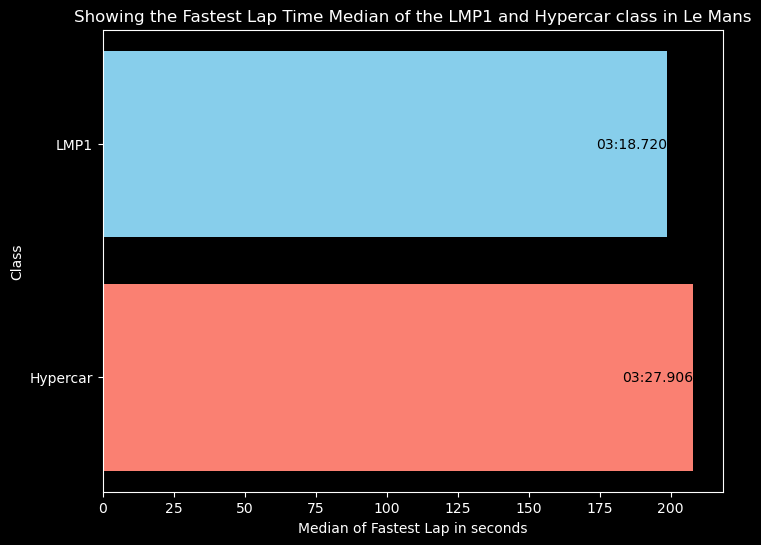

In [34]:
# Filter the data for season_race starting with 'LeMans', class = 'LMP1' or 'Hypercar', and status = 'Classified'
filtered_data = wec_analysis[(wec_analysis['season_race'].str.startswith('LeMans')) & (wec_analysis['status'] == 'Classified') & (wec_analysis['class'].isin(['LMP1', 'Hypercar']))]

# Calculate the median fl_time for each season_race, class, and race
median_fl_time = filtered_data.groupby(['season_race', 'class'])['fl_time_seconds'].median().reset_index()

# Find the season_race with the lowest median fl_time_seconds for LMP1 and Hypercar classes
lowest_median_season_race = median_fl_time.groupby('class')['fl_time_seconds'].idxmin()

# Extract the median for the season_race with the lowest median fl_time_seconds for LMP1 and Hypercar classes
lowest_median_fl_time = median_fl_time.loc[lowest_median_season_race].reset_index()

# Plot a horizontal bar graph showing the lowest median fl_time for LMP1 and Hypercar classes
plt.figure(figsize=(8, 6))
plt.barh(lowest_median_fl_time['class'], lowest_median_fl_time['fl_time_seconds'], color=['salmon', 'skyblue'])

for i, (val, class_name) in enumerate(zip(lowest_median_fl_time['fl_time_seconds'], lowest_median_fl_time['class'])):
    plt.text(val, i, f"{int(val//60):02d}:{val%60:06.3f}", color='black', va='center', ha='right')

plt.ylabel('Class')
plt.xlabel('Median of Fastest Lap in seconds')
plt.title('Showing the Fastest Lap Time Median of the LMP1 and Hypercar class in Le Mans')
plt.show()

*We can see that the fastest Lap Time median of the LMP1 class (Season 2018-2019, second Le Mans race) is a little less than 10 seconds faster than the Hypercar as far as 2023 Season in Le Mans*

##### **Let's compare the difference in performance of the LMP2**

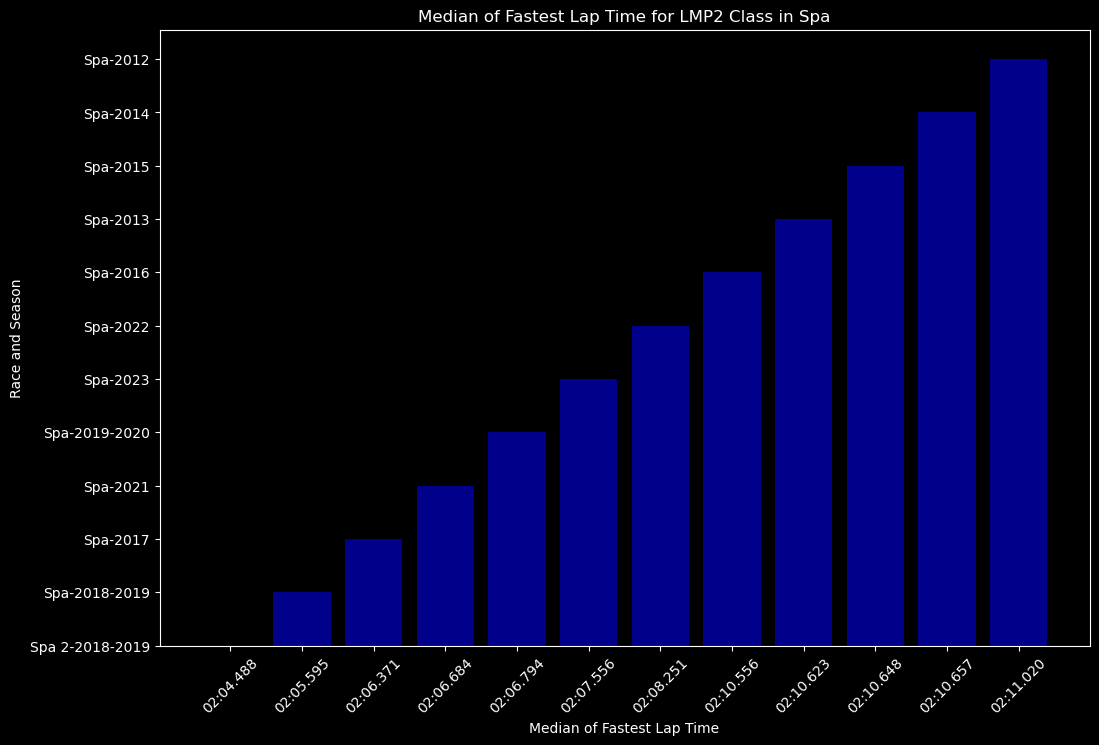

In [35]:
# Filter the data for status = 'Classified' and class = 'LMP2' and Spa race
filtered_data_lmp2 = wec_analysis[((wec_analysis['status'] == 'Classified') & (wec_analysis['class'] == 'LMP2') & (wec_analysis['race'].str.startswith('Spa')))]

# Calculate the median fl_time for each season_race in minutes and seconds
filtered_data_lmp2 = filtered_data_lmp2.groupby(['season_race'])['fl_time_seconds'].median().apply(lambda x: f"{int(x//60):02d}:{x%60:06.3f}")

# Order the median fl_time values
filtered_data_lmp2 = filtered_data_lmp2.sort_values()

# Create a bar graph for the lowest fl_time for LMP2 class with bars in x-axis ordered by fl_time
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_data_lmp2, filtered_data_lmp2.index, color='darkblue')
plt.xlabel('Median of Fastest Lap Time')
plt.ylabel('Race and Season')
plt.title('Median of Fastest Lap Time for LMP2 Class in Spa')
plt.xticks(rotation=45)
plt.show()

*Here we compare the median of the fastest lap time of the LMP2 class in the Spa track each season.*

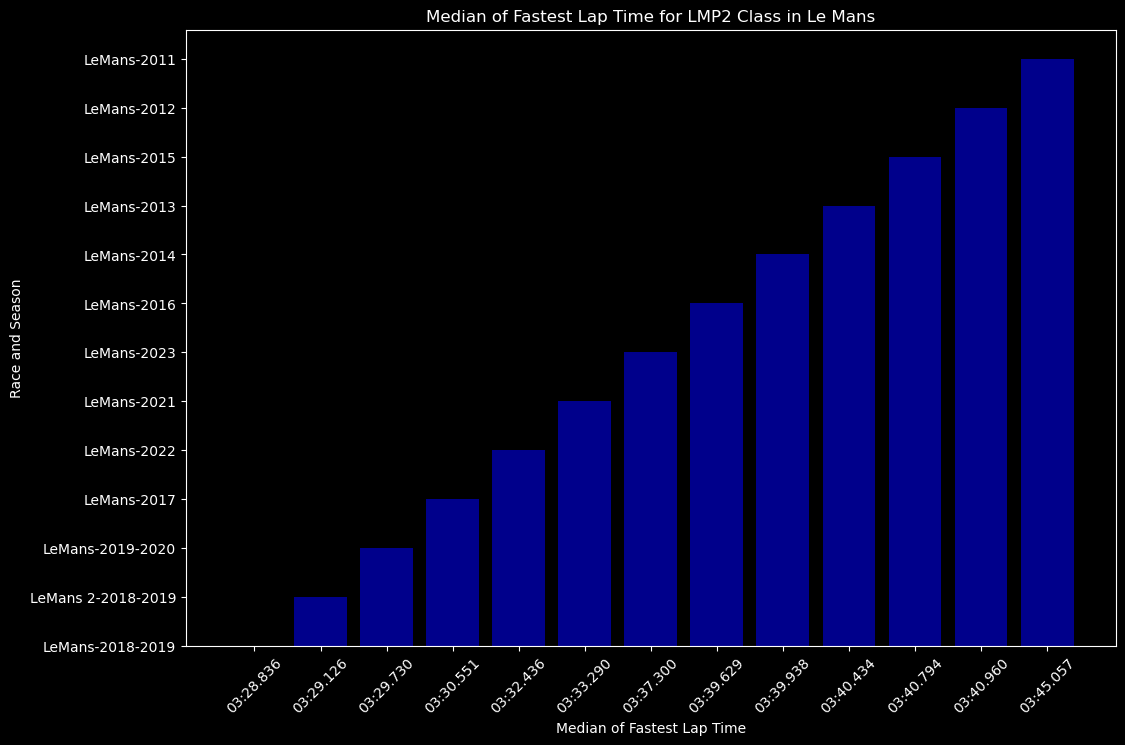

In [36]:
# Filter the data for status = 'Classified' and class = 'LMP2' and Le Mans race
filtered_data_lmp2 = wec_analysis[((wec_analysis['status'] == 'Classified') & (wec_analysis['class'] == 'LMP2') & (wec_analysis['race'].str.startswith('LeMans')))]

# Calculate the median fl_time for each season_race in minutes and seconds
filtered_data_lmp2 = filtered_data_lmp2.groupby(['season_race'])['fl_time_seconds'].median().apply(lambda x: f"{int(x//60):02d}:{x%60:06.3f}")

# Order the median fl_time values
filtered_data_lmp2 = filtered_data_lmp2.sort_values()

# Create a bar graph for the lowest fl_time for LMP2 class with bars in x-axis ordered by fl_time
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_data_lmp2, filtered_data_lmp2.index, color='darkblue')
plt.xlabel('Median of Fastest Lap Time')
plt.ylabel('Race and Season')
plt.title('Median of Fastest Lap Time for LMP2 Class in Le Mans')
plt.xticks(rotation=45)
plt.show()

*Here we compare the median of the fastest lap time of the LMP2 class in the Le Mans track each season.*

*Something to keep in mind*
* *The LMP2 class has had some regulation changes over the years, including changes to accomodate the Hypercar class*

##### **Let's compare the difference in performance of the GTE**

*First, the GTE Pro class in Le Mans*

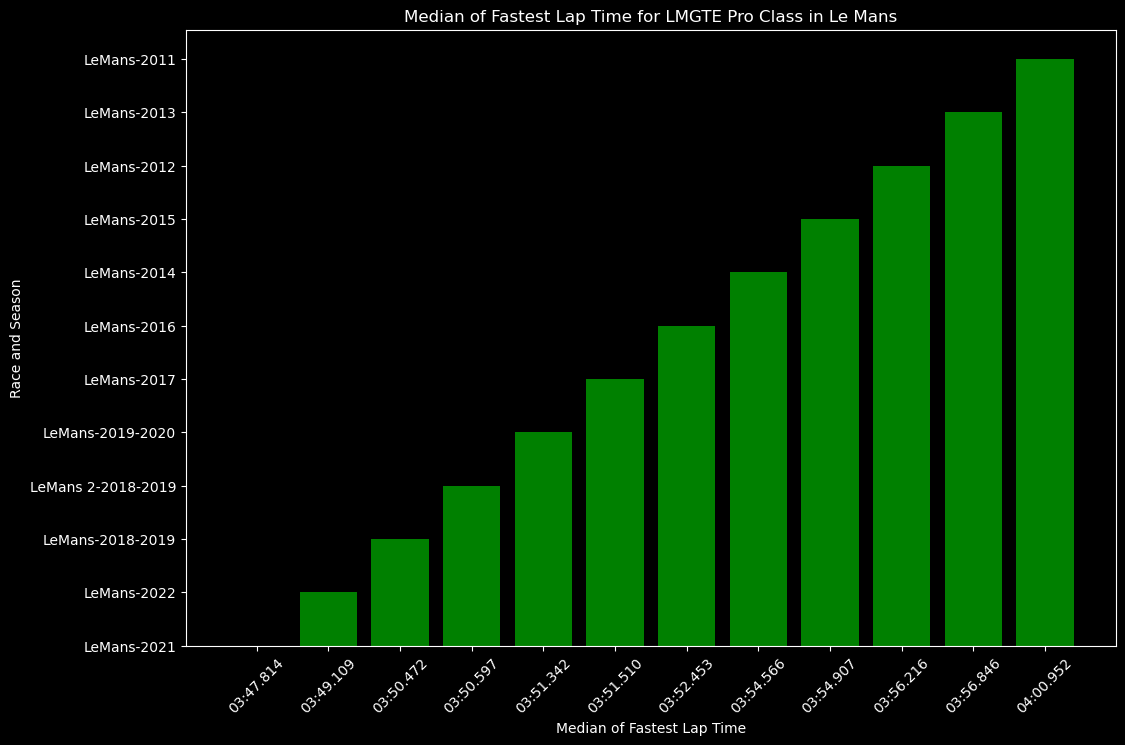

In [37]:
# Filter the data for status = 'Classified' and class = 'LMGTE Pro' and Le Mans race
filtered_data_gtepro = wec_analysis[((wec_analysis['status'] == 'Classified') & (wec_analysis['class'] == 'LMGTE Pro') & (wec_analysis['race'].str.startswith('LeMans')))]

# Calculate the median fl_time for each season_race in minutes and seconds
filtered_data_gtepro = filtered_data_gtepro.groupby(['season_race'])['fl_time_seconds'].median().apply(lambda x: f"{int(x//60):02d}:{x%60:06.3f}")

# Order the median fl_time values
filtered_data_gtepro = filtered_data_gtepro.sort_values()

# Create a bar graph for the lowest fl_time for LMGTE Pro class with bars in x-axis ordered by fl_time
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_data_gtepro, filtered_data_gtepro.index, color='green')
plt.xlabel('Median of Fastest Lap Time')
plt.ylabel('Race and Season')
plt.title('Median of Fastest Lap Time for LMGTE Pro Class in Le Mans')
plt.xticks(rotation=45)
plt.show()

*As expected and shown previously, the cars and teams tend to get better with each season, learning the new cars, better understanding the data and so on, the manufacturers will also make new models with being faster and more reliable as the main objectives, we will also see it in the LMGTE Am category*

*Now, GTE Am*

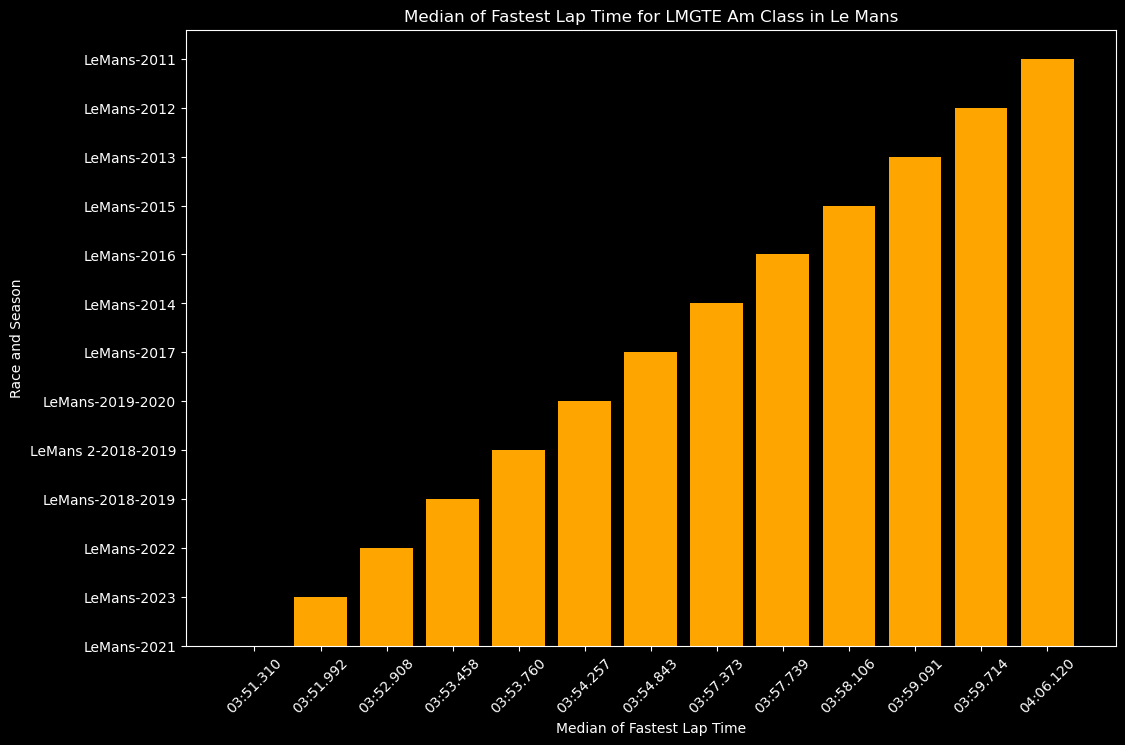

In [38]:
# Filter the data for status = 'Classified' and class = 'LMGTE Am' and Le Mans race
filtered_data_gteam = wec_analysis[((wec_analysis['status'] == 'Classified') & (wec_analysis['class'] == 'LMGTE Am') & (wec_analysis['race'].str.startswith('LeMans')))]

# Calculate the median fl_time for each season_race in minutes and seconds
filtered_data_gteam = filtered_data_gteam.groupby(['season_race'])['fl_time_seconds'].median().apply(lambda x: f"{int(x//60):02d}:{x%60:06.3f}")

# Order the median fl_time values
filtered_data_gteam = filtered_data_gteam.sort_values()

# Create a bar graph for the lowest fl_time for LMGTE Am class with bars in x-axis ordered by fl_time
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_data_gteam, filtered_data_gteam.index, color='orange')
plt.xlabel('Median of Fastest Lap Time')
plt.ylabel('Race and Season')
plt.title('Median of Fastest Lap Time for LMGTE Am Class in Le Mans')
plt.xticks(rotation=45)
plt.show()

*As expected, the same behaviour of lap time improvements happen here*

*And now we compare the difference in performance between them*

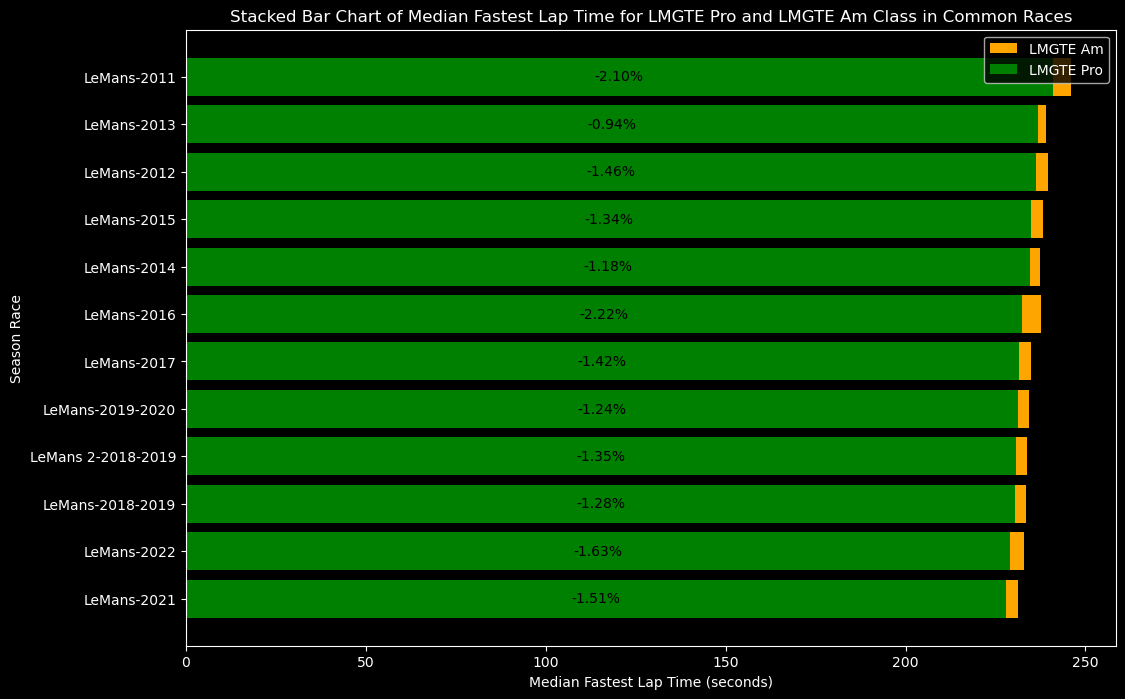

In [39]:


filtered_data_lmgte_pro_lemans = wec_analysis[((wec_analysis['status'] == 'Classified') & (wec_analysis['class'] == 'LMGTE Pro') & (wec_analysis['race'].str.startswith('LeMans')))]
filtered_data_lmgte_am_lemans = wec_analysis[((wec_analysis['status'] == 'Classified') & (wec_analysis['class'] == 'LMGTE Am') & (wec_analysis['race'].str.startswith('LeMans')))]

common_races = set(filtered_data_lmgte_pro_lemans['season_race']).intersection(set(filtered_data_lmgte_am_lemans['season_race']))

filtered_data_lmgte_pro_common = filtered_data_lmgte_pro_lemans[filtered_data_lmgte_pro_lemans['season_race'].isin(common_races)]
filtered_data_lmgte_am_common = filtered_data_lmgte_am_lemans[filtered_data_lmgte_am_lemans['season_race'].isin(common_races)]

median_fl_time_lmgte_pro_common = filtered_data_lmgte_pro_common.groupby(['season_race'])['fl_time_seconds'].median()
median_fl_time_lmgte_am_common = filtered_data_lmgte_am_common.groupby(['season_race'])['fl_time_seconds'].median()

median_fl_time_lmgte_pro_common = median_fl_time_lmgte_pro_common.sort_values()
median_fl_time_lmgte_am_common = median_fl_time_lmgte_am_common.loc[median_fl_time_lmgte_pro_common.index]

plt.figure(figsize=(12, 8))
for i in range(len(median_fl_time_lmgte_pro_common)):
    plt.text(median_fl_time_lmgte_pro_common[i] / 2, i, f"{((median_fl_time_lmgte_pro_common[i] - median_fl_time_lmgte_am_common[i]) / median_fl_time_lmgte_am_common[i]) * 100:.2f}%", color='black', ha='center', va='center')
plt.barh(median_fl_time_lmgte_am_common.index, median_fl_time_lmgte_am_common, color='orange', label='LMGTE Am')
plt.barh(median_fl_time_lmgte_pro_common.index, median_fl_time_lmgte_pro_common, color='green', label='LMGTE Pro')

plt.ylabel('Season Race')
plt.xlabel('Median Fastest Lap Time (seconds)')
plt.title('Stacked Bar Chart of Median Fastest Lap Time for LMGTE Pro and LMGTE Am Class in Common Races')
plt.legend()
plt.show()

*We can see how faster the LMGTE Pro is compared to LMGTE Am on Le Mans. Things to keep in mind:*
* *In LMGTE Am, the drivers normally are not Professionals, hence the name 'Am' for Amateurs;*
* *If a car make, produces a new model, only the LMGTE Pro teams are allowed to use it in that year, the LMGTE Am will only be able to race that car in the following season.*

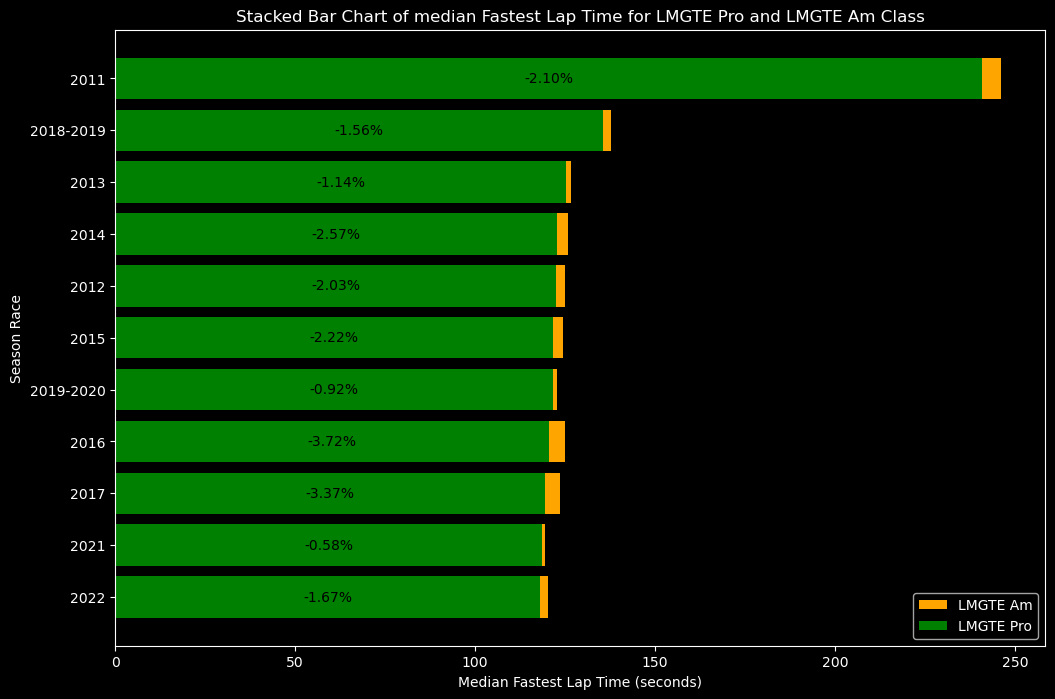

In [40]:
filtered_data_lmgte_pro = wec_analysis[((wec_analysis['status'] == 'Classified') & (wec_analysis['class'] == 'LMGTE Pro') & (wec_analysis['season']))]
filtered_data_lmgte_am = wec_analysis[((wec_analysis['status'] == 'Classified') & (wec_analysis['class'] == 'LMGTE Am') & (wec_analysis['season']))]

common_seasons = set(filtered_data_lmgte_pro['season']).intersection(set(filtered_data_lmgte_am['season']))

filtered_data_lmgte_pro_common = filtered_data_lmgte_pro[filtered_data_lmgte_pro['season'].isin(common_seasons)]
filtered_data_lmgte_am_common = filtered_data_lmgte_am[filtered_data_lmgte_am['season'].isin(common_seasons)]

median_fl_time_lmgte_pro_common = filtered_data_lmgte_pro_common.groupby(['season'])['fl_time_seconds'].median()
median_fl_time_lmgte_am_common = filtered_data_lmgte_am_common.groupby(['season'])['fl_time_seconds'].median()

median_fl_time_lmgte_pro_common = median_fl_time_lmgte_pro_common.sort_values()
median_fl_time_lmgte_am_common = median_fl_time_lmgte_am_common.loc[median_fl_time_lmgte_pro_common.index]

percentage_diff = [((median_fl_time_lmgte_pro_common[i] - median_fl_time_lmgte_am_common[i]) / median_fl_time_lmgte_am_common[i]) * 100 for i in range(len(median_fl_time_lmgte_pro_common))]
average_percentage_diff_per_race = sum(percentage_diff) / len(percentage_diff)

plt.figure(figsize=(12, 8))
for i in range(len(median_fl_time_lmgte_pro_common)):
    plt.text(median_fl_time_lmgte_pro_common[i] / 2, i, f"{((median_fl_time_lmgte_pro_common[i] - median_fl_time_lmgte_am_common[i]) / median_fl_time_lmgte_am_common[i]) * 100:.2f}%", color='black', ha='center', va='center')
plt.barh(median_fl_time_lmgte_am_common.index, median_fl_time_lmgte_am_common, color='orange', label='LMGTE Am')
plt.barh(median_fl_time_lmgte_pro_common.index, median_fl_time_lmgte_pro_common, color='green', label='LMGTE Pro')

plt.ylabel('Season Race')
plt.xlabel('Median Fastest Lap Time (seconds)')
plt.title(f'Stacked Bar Chart of median Fastest Lap Time for LMGTE Pro and LMGTE Am Class')
plt.legend()
plt.show()

*We can see how fast the LMGTE Pro is compared to LMGTE Am, keeping in mind all the previous explanations as to why that happens*